# Used Cars Price Prediction

The dataset from Kaggle (https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset) contains data about 762,091 used cars scraped from cars.com. The data was collected on Apr, 2023.

In [1]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Import the numpy library and alias it as 'np'
import numpy as np

# Import the datetime module, which is part of the Python standard library
import datetime

# Import the matplotlib library and alias it as 'plt'
import matplotlib.pyplot as plt

# Import the seaborn library and alias it as 'sns'
import seaborn as sns

In [2]:
# Read a CSV file named 'cars.csv' into a pandas DataFrame called 'cars'
cars = pd.read_csv('cars.csv')

# Display the first 5 rows of the 'cars' DataFrame
cars.head()

C:\Users\jbo1881\AppData\Local\Temp\1\ipykernel_12688\4013093893.py:2: DtypeWarning: Columns (2,3,12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  cars = pd.read_csv('cars.csv')


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price;
0,"Acura,ILX Hybrid 1.5L,2013,92945.0,""1.5L I-4 i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,ILX Hybrid 1.5L,2013.0,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0;
2,Acura,ILX Hybrid 1.5L,2013.0,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0;
3,Acura,ILX Hybrid 1.5L,2013.0,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0;
4,Acura,ILX Hybrid 1.5L,2013.0,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0;


# Data Understanding

In [3]:
# 1. Identify Columns

print(cars.columns)

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price;'],
      dtype='object')


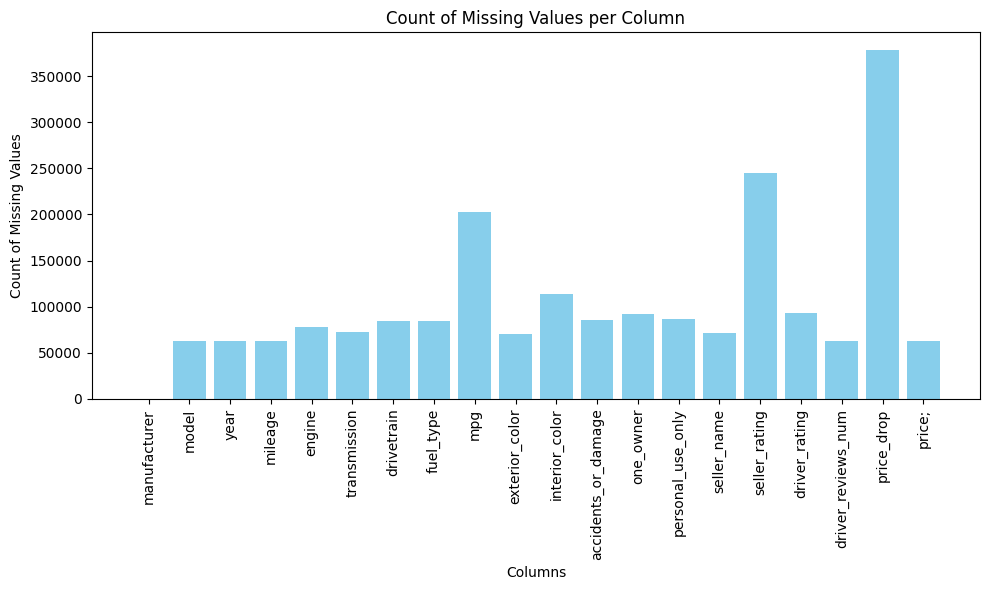

In [4]:
# 2. Check Missing Values

# Count the missing values for each column
missing_values_count = cars.isna().sum()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.bar(missing_values_count.index, missing_values_count.values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
cars.isna().sum()

manufacturer                0
model                   62847
year                    62847
mileage                 63343
engine                  77607
transmission            72274
drivetrain              84049
fuel_type               84990
mpg                    202089
exterior_color          70065
interior_color         113680
accidents_or_damage     85739
one_owner               92385
personal_use_only       86312
seller_name             71446
seller_rating          244491
driver_rating           92793
driver_reviews_num      62852
price_drop             378403
price;                  62853
dtype: int64

In [6]:
# 2.1 Remove rows with any missing (NaN) values from the 'cars' DataFrame
cars = cars.dropna()

In [7]:
# 3. Check data types

cars.dtypes

manufacturer            object
model                   object
year                    object
mileage                 object
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner               object
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num      object
price_drop             float64
price;                  object
dtype: object

In [8]:
# 4. Basic statistical summary

cars.describe()

,accidents_or_damage,personal_use_only,seller_rating,driver_rating,price_drop
count,231227.000000,231227.000000,231227.000000,231227.000000,231227.000000
mean,0.237035,0.694460,4.195212,4.657257,906.552518
std,0.425265,0.460637,0.770894,0.238622,1139.495460
min,0.000000,0.000000,1.000000,1.000000,100.000000
25%,0.000000,0.000000,3.900000,4.600000,327.000000
50%,0.000000,1.000000,4.500000,4.700000,558.000000
75%,0.000000,1.000000,4.700000,4.800000,1000.000000
max,1.000000,1.000000,5.000000,5.000000,79909.000000


In [9]:
# 5. Check data distribution
for column in cars.columns:
    print(column)
    print(cars[column].value_counts())
    print()

manufacturer
manufacturer
Toyota           19407
Ford             18669
Jeep             15382
Nissan           14475
Chevrolet        14171
Kia              12411
Honda            12400
BMW              11429
Mercedes-Benz    11131
Subaru            9516
Volkswagen        8668
Hyundai           8050
GMC               8032
Lexus             7883
Dodge             7727
Audi              6785
Mazda             6005
Cadillac          5336
Buick             5044
Land Rover        4501
Lincoln           3629
Chrysler          3401
RAM               3076
Volvo             2979
Porsche           2968
Acura             2783
INFINITI          2752
Mitsubishi        1446
Jaguar            1171
Name: count, dtype: int64

model
model
Sportage LX                         1296
Fusion SE                           1001
Explorer XLT                         981
Rogue SV                             978
CX-5 Touring                         967
                                    ... 
Forester 4DR SUV 2.5I 

mileage
0.0         153
1.0          22
32000.0      17
37000.0      16
98000.0      16
           ... 
94629.0       1
10807.0       1
144736.0      1
7870.0        1
26781.0       1
Name: count, Length: 107417, dtype: int64

engine
engine
2.0L I4 16V GDI DOHC Turbo                                          31000
3.6L V6 24V MPFI DOHC                                               12648
3.6L V6 24V GDI DOHC                                                10928
1.5L I4 16V GDI DOHC Turbo                                           7459
2.4L I4 16V GDI DOHC                                                 7097
                                                                    ...  
2.3L I4 16V MPFI SOHC                                                   1
Engine: 1.8L I-4 SOHC 16-Valve i-VTEC -inc: Eco Assist system an        1
Engine: 2.0L I-4 16-Valve DOHC i-VTEC -inc: direct fuel injectio        1
1.8L I4 16V MPFI SOHC CNG                                               1
Engine: 2.5L 20V In

# Data Visualization

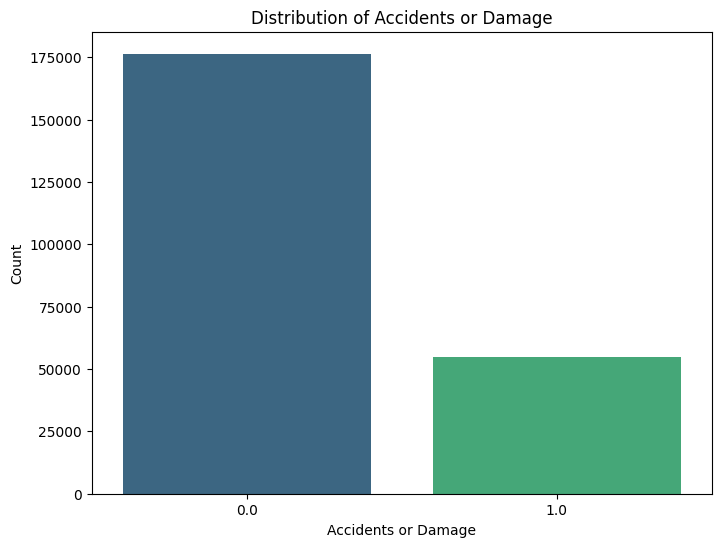

In [10]:
# Histogram of Accidents or Damage:

plt.figure(figsize=(8, 6))
sns.countplot(data=cars, x='accidents_or_damage', palette='viridis')
plt.xlabel('Accidents or Damage')
plt.ylabel('Count')
plt.title('Distribution of Accidents or Damage')
plt.show()


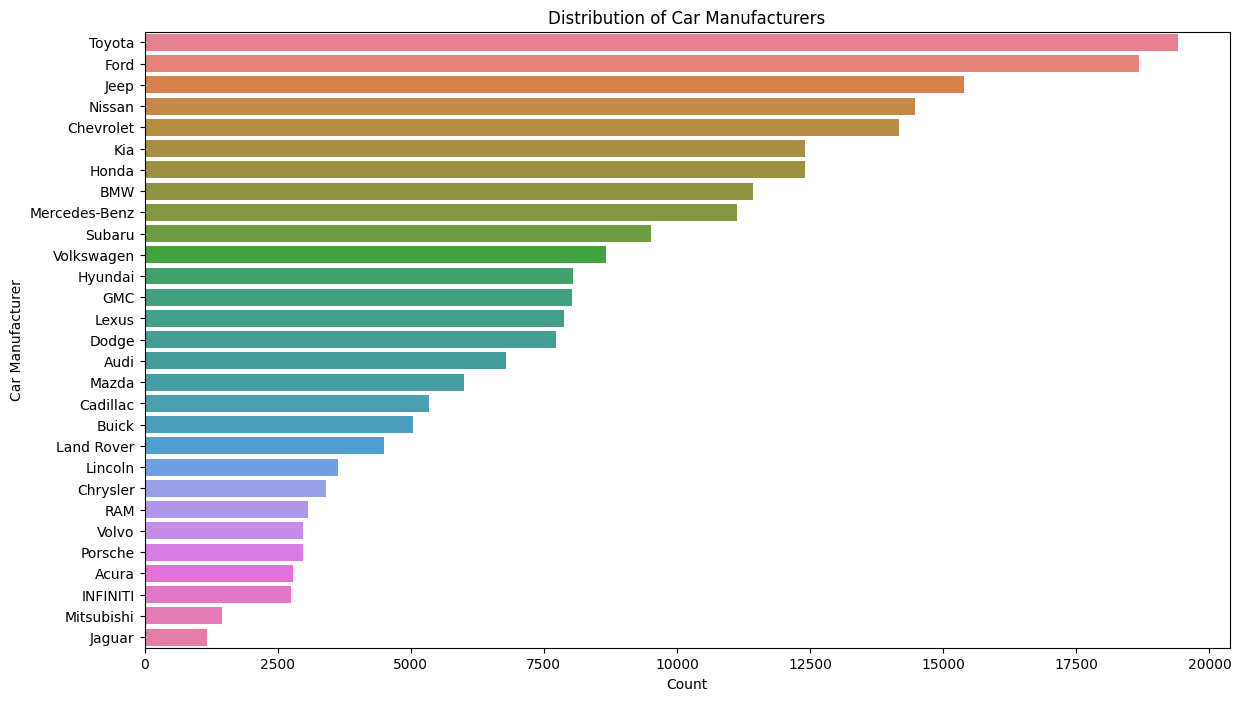

In [11]:
# Distribution of car manufacturers

plt.figure(figsize=(14, 8))
sns.countplot(data=cars, y='manufacturer', order=cars['manufacturer'].value_counts().index, palette='husl')
plt.xlabel('Count')
plt.ylabel('Car Manufacturer')
plt.title('Distribution of Car Manufacturers')
plt.show()


# Data Preparation

In [12]:
# Rename the column 'price;' to 'price' in the 'cars' DataFrame
cars.rename(columns={'price;': 'price'}, inplace=True)

# Remove trailing ';' from the 'price' column in the 'cars' DataFrame
cars['price'] = cars['price'].str.strip(';')


In [13]:
# Convert 'one_owner' and 'personal_use_only' columns to boolean type in the 'cars' DataFrame
cars[['one_owner', 'personal_use_only']] = cars[['one_owner', 'personal_use_only']].astype('bool_')

# Convert 'year' column to integer type in the 'cars' DataFrame
cars['year'] = cars['year'].astype('int')

# Convert 'mileage', 'driver_reviews_num', and 'price' columns to float type in the 'cars' DataFrame
cars[['mileage', 'driver_reviews_num', 'price']] = cars[['mileage', 'driver_reviews_num', 'price']].astype('float64')

# Display the first 5 rows of the 'cars' DataFrame
#cars.head()


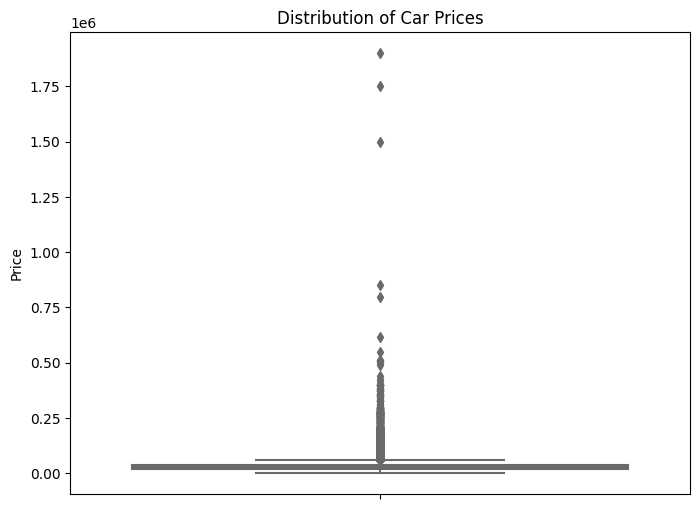

In [14]:
# Boxplot of Price Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=cars, y='price', palette='Set3')
plt.ylabel('Price')
plt.title('Distribution of Car Prices')
plt.show()


#  Here are three questions I address to explore and analyze the dataset of used cars, before implementing the ML Model:


# 1. What is the most common car manufacturer and model in the dataset, and what is the average price for each manufacturer and model?

In [15]:
# Group the 'cars' DataFrame by 'manufacturer', count the number of models for each manufacturer, and sort in descending order
most_manu = cars.groupby(by=['manufacturer'])['model'].count().sort_values(ascending=False)

# Reset the index of the resulting series to make it a DataFrame
most_manu = most_manu.reset_index()


In [16]:
# Filter the 'cars' DataFrame for the manufacturer with the most models
price_most_manu = cars[cars['manufacturer'] == most_manu.iloc[0][0]]

# Calculate the mean (average) price for this manufacturer and round to the nearest integer
price_most_manu = int(round(np.mean(price_most_manu['price']), 0))


In [17]:
# Print a formatted statement about the most common car manufacturer and its average price
print('The most common car manufacturer in the dataset is {manu} with {num}% of the total cars. The average price of a used {manu} is {price}$.'.format(
    manu=most_manu.iloc[0][0],  # Insert the most common manufacturer
    num=round(100 * (most_manu.iloc[0][1] / len(cars)), 2),  # Calculate the percentage of cars for the most common manufacturer
    price=price_most_manu  # Insert the average price for the most common manufacturer
))


The most common car manufacturer in the dataset is Toyota with 8.39% of the total cars. The average price of a used Toyota is 30650$.


In [18]:
# Count the occurrences of each car model and sort them in descending order
most_model = cars['model'].value_counts()

# Reset the index of the resulting series to make it a DataFrame
most_model = most_model.reset_index()

# Extract the most common car model (the first entry after sorting)
most_model = most_model.iloc[0][0]


In [19]:
# Filter the 'cars' DataFrame for the manufacturer of the most common model
most_model_manu = cars[cars['model'] == most_model]['manufacturer'].iloc[0]

# Filter the 'cars' DataFrame for the manufacturer of the most common model and calculate the average price
price_most_model = cars[cars['manufacturer'] == most_model_manu]
price_most_model = int(round(np.mean(price_most_model['price']), 0))


In [20]:
# Print a formatted statement about the most common car model and its average price
print('The most common model car is {model}, which is manufactured by {manuf}. The average price of a used {model} is {price}$.'.format(
    model=most_model,  # Insert the most common car model
    manuf=most_model_manu,  # Insert the manufacturer of the most common model
    price=price_most_model  # Insert the average price for the most common model
))


The most common model car is Sportage LX, which is manufactured by Kia. The average price of a used Sportage LX is 22515$.


 # 2. Is there a correlation between the age of a car (year), its mileage, whether it has had accidents, and its price?

In [21]:
# Calculate the age of each car based on the current year
cars['age'] = datetime.datetime.now().year - cars['year']

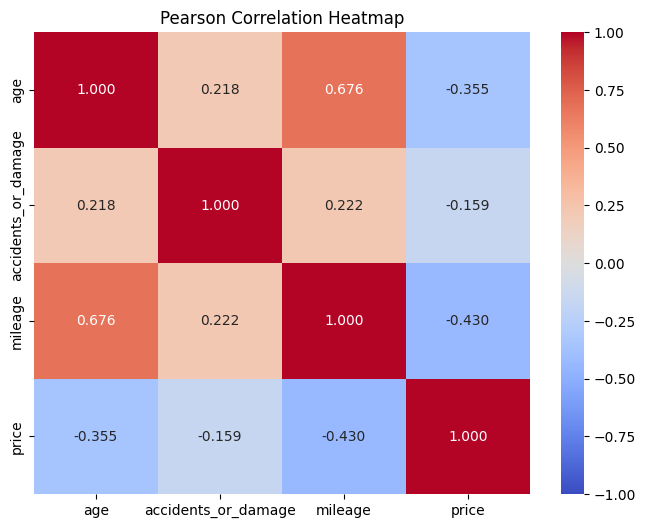

In [22]:
# Compute the Pearson correlation coefficient for the specified columns in the 'cars' DataFrame
correlation_matrix = cars[['age', 'accidents_or_damage', 'mileage', 'price']].corr(method='pearson', numeric_only=True)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()


Conclusions:

- Older cars tend to have higher mileage, which is intuitive.
- Older cars, on average, tend to have lower prices.
- Cars with higher mileage, on average, tend to have lower prices.
- Cars with a history of accidents or damage tend to have slightly higher mileage and lower prices.

# 3. Does the type of transmission (automatic, manual, etc.) or fuel type impact the car's miles per gallon (mpg), and how does it affect the price?

In [23]:
# Count the occurrences of each transmission type
transmissions_counts = cars['transmission'].value_counts()

# Print the counts of each transmission type
print(transmissions_counts)

transmission
8-Speed Automatic                          58374
6-Speed Automatic                          48278
Automatic CVT                              40412
9-Speed Automatic                          24730
10-Speed Automatic                         12321
                                           ...  
6-Speed Automatic Electronic with ECT-i        1
6 Speed Manual                                 1
8-Speed                                        1
8-Speed Shiftable Automatic                    1
Automatic 6-Speed                              1
Name: count, Length: 137, dtype: int64


In [24]:
# Clean and standardize the 'transmission' column to have values 'automatic' or 'manual'
cars['transmission'] = cars['transmission'].apply(lambda row: 'automatic' if 'automatic' in row.lower() or 'auto' in row.lower() or 'cvt' in row.lower() or 'variable' in row.lower() or 'A/T' in row else ('manual' if 'manual' in row.lower() or 'M/T' in row else row))

# Count the occurrences of each transmission type
transmission_counts = cars['transmission'].value_counts()


In [25]:
# Drop rows where the 'transmission' column does not have 'manual' or 'automatic'
cars = cars.drop(cars[~((cars['transmission'] == 'manual') | (cars['transmission'] == 'automatic'))].index)

# Count the occurrences of each transmission type after dropping other rows
transmission_counts = cars['transmission'].value_counts()


In [26]:
# Count the occurrences of each fuel type
fuel_type_counts = cars['fuel_type'].value_counts()

# Print the counts of each fuel type
print(fuel_type_counts)


fuel_type
Gasoline                         216925
Hybrid                             8036
E85 Flex Fuel                      4200
Diesel                             1709
Flexible Fuel                        32
Gasoline/Mild Electric Hybrid         4
Compressed Natural Gas                1
Gasoline Fuel                         1
Hydrogen Fuel Cell                    1
Name: count, dtype: int64


In [27]:
# Clean and standardize the 'fuel_type' column to have values 'gasoline', 'diesel', or 'hybrid'
cars['fuel_type'] = cars['fuel_type'].apply(lambda row: 'gasoline' if ('gasoline' in row.lower() or 'flex' in row.lower() or 'flexible' in row.lower()) else ('diesel' if 'diesel' in row.lower() else ('hybrid' if 'hybrid' in row.lower() else row)))

# Count the occurrences of each fuel type
fuel_type_counts = cars['fuel_type'].value_counts()


In [28]:
# change fuel_type to just 'gasoline', 'diesel', 'hybrid'

cars['fuel_type'] = cars['fuel_type'].apply(lambda row: 'gasoline' if ('gasoline' in row.lower() or 'flex' in row.lower() or 'flexible' in row.lower()) else ('diesel' if 'diesel' in row.lower() else ('hybrid' if 'hybrid' in row.lower() else row)))

In [29]:
# drop the other rows that are not gasoline, diesel or hybrid
cars = cars.drop(cars[~((cars['fuel_type'] == 'gasoline') | (cars['fuel_type'] == 'diesel') | (cars['fuel_type'] == 'hybrid'))].index)

cars['fuel_type'].value_counts()


fuel_type
gasoline    221162
hybrid        8036
diesel        1709
Name: count, dtype: int64

In [30]:
# Calculate the mean MPG for each car based on a string like "10-15" in the 'mpg' column
cars['mpg'] = cars['mpg'].apply(lambda x: np.mean([float(e) for e in x.split('-')]))

In [31]:
# Import the LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder for 'transmission'
le_transmission = LabelEncoder()

# Encode the 'transmission' column
# 0: automatic, 1: manual
cars['transmission'] = le_transmission.fit_transform(cars['transmission'])


In [32]:
# Initialize a LabelEncoder for 'fuel_type'
le_fuel_type = LabelEncoder()

# Encode the 'fuel_type' column
cars['fuel_type'] = le_fuel_type.fit_transform(cars['fuel_type'])


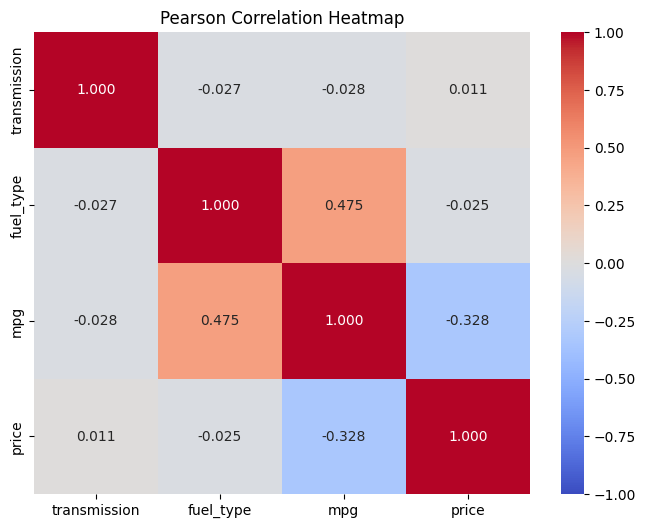

In [33]:
# Compute the Pearson correlation coefficient for the specified columns in the 'cars' DataFrame
correlation_matrix=cars[['transmission', 'fuel_type', 'mpg', 'price']].corr(method='pearson', numeric_only=True)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

Conclusions:
- Transmission vs. Price: There is a very weak positive correlation (approximately 0.011), suggesting that the type of transmission (automatic or manual) has little to no linear influence on car prices.
- Fuel Type vs. Price: There is a very weak negative correlation (approximately -0.025), indicating that the type of fuel (diesel, gasoline, or hybrid) has minimal linear impact on car prices.
- mpg vs. Price: There is a moderate negative correlation (approximately -0.328), indicating a noticeable inverse relationship between fuel efficiency (mpg) and car prices. Higher mpg values tend to be associated with lower car prices.
- Transmission vs. mpg: There is a very weak negative correlation between the type of transmission and fuel efficiency (mpg). This suggests that the choice of transmission (automatic or manual) has a very minor influence on a car's fuel efficiency.
- Fuel Type vs. mpg: There is a moderate positive correlation between fuel type (diesel, gasoline, or hybrid) and fuel efficiency (mpg). This indicates that the type of fuel a car uses has a moderate impact on its fuel efficiency. Hybrid cars tend to have higher mpg ratings compared to diesel or gasoline cars.

# Machine Learning Model: Used Car Price Prediction

A regression model to predict the price of a used car based on features like year, mileage, engine, transmission, fuel type, and more. 

This can be valuable for both buyers and sellers to estimate the fair market value of a car.

ML Model Selection: **Random Forest Regression**

In [34]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split  # Import train-test split function
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.metrics import r2_score  # Import metrics for evaluation
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data preprocessing
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for hyperparameter tuning
from scipy.stats import randint  # Import randint for generating random integers


In [35]:
# Count the occurrences of each unique value in the 'drivetrain' column
# This provides a distribution of different drivetrain types in the dataset
cars['drivetrain'].value_counts()

drivetrain
All-wheel Drive      84906
Front-wheel Drive    76231
Four-wheel Drive     45081
Rear-wheel Drive     23308
FWD                    501
AWD                    464
4WD                    242
RWD                    174
Name: count, dtype: int64

In [36]:
# Standardize the 'drivetrain' column values to common categories: AWD, FWD, RWD, 4WD
cars['drivetrain'] = cars['drivetrain'].apply(lambda row: 
    'All-wheel Drive' if 'awd' in row.lower() else (
        'Front-wheel Drive' if 'fwd' in row.lower() else (
            'Rear-wheel Drive' if 'rwd' in row.lower() else (
                'Four-wheel Drive' if '4wd' in row.lower() else row
            )
        )
    )
)


In [37]:
cars['drivetrain'].value_counts()

drivetrain
All-wheel Drive      85370
Front-wheel Drive    76732
Four-wheel Drive     45323
Rear-wheel Drive     23482
Name: count, dtype: int64

In [38]:
# Dictionary to store encoders
label_encoders = {}
categorical_columns = ['manufacturer', 'model', 'drivetrain', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'exterior_color', 'interior_color']

# Iterate through categorical columns and create encoders
for column in categorical_columns:
    le = LabelEncoder()
    cars[column] = le.fit_transform(cars[column])
    # Store the encoder in the dictionary
    label_encoders[column] = le

# Now label_encoders contains encoders for each categorical column

# Example: How to use the encoders
sample_input = {'manufacturer': 'Audi', 'model': 'R8', 'drivetrain': 'All-wheel Drive', 'accidents_or_damage': 0.0}
encoded_input = {}
for col, value in sample_input.items():
    le = label_encoders[col]
    encoded_input[col] = le.transform([value])[0]

# print("Encoded input:", encoded_input)

In [39]:
# Define features (X) and target variable (y)
X = cars[['manufacturer', 'model', 'transmission', 'fuel_type',  'price_drop', 'age', 'mileage', 'mpg', 'drivetrain', 'accidents_or_damage']]
y = cars['price']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# # Set up a randomized search for hyperparameter tuning of a RandomForestRegressor model using scikit-learn's RandomizedSearchCV

# # Define a narrower range of hyperparameters
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': randint(2, 11),  # Use a distribution for random search
#     'min_samples_leaf': randint(1, 5)     # Use a distribution for random search
# }

# # Use RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     RandomForestRegressor(),
#     param_distributions=param_dist,
#     n_iter=10,  # Adjust the number of iterations based on your time constraints
#     cv=3,       # Adjust the number of folds based on your time constraints
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# # Perform the randomized search
# random_search.fit(X_train, y_train)

# # Get the best model
# best_rf_model = random_search.best_estimator_

In [48]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Set up a randomized search for hyperparameter tuning of a LinearRegression model using scikit-learn's RandomizedSearchCV

# Define a narrower range of hyperparameters for Linear Regression
param_dist = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'n_jobs': [-1] 
}

# Use RandomizedSearchCV for Linear Regression
linear_search = RandomizedSearchCV(
    LinearRegression(),
    param_distributions=param_dist,
    n_iter=5, 
    cv=3,      
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the randomized search for Linear Regression
linear_search.fit(X_train, y_train)

# Get the best model
best_linear_model = linear_search.best_estimator_

# Make predictions on the test data
y_pred = best_linear_model.predict(X_test)

# Evaluate the Linear Regression model performance
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score (Linear Regression):", r2)


C:\Users\jbo1881\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R-squared (R2) Score (Linear Regression): 0.43066479017694836


In [42]:
# Save the model (Random Forest)

import pickle

# pickle.dump(best_rf_model, open('ML_Project4_Model', 'wb'))

# Load the model
loaded_model = pickle.load(open('ML_Project4_Model', 'rb'))

# Rename the loaded model
best_rf_model = loaded_model

In [43]:
# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

In [44]:
# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9163239603349843


In [45]:
# EXAMPLE OF PRICE PREDICTION

# New input data
new_input = ['Toyota', 'Sequoia Limited', 'manual', 'gasoline', 900, 19, 200000, 16, 'Rear-wheel Drive', 0.0]

# Transform the input to numerical values using previously used label encoders and transformations
transformed_input = {
    'manufacturer': label_encoders['manufacturer'].transform([new_input[0]])[0],
    'model': label_encoders['model'].transform([new_input[1]])[0],
    'transmission': le_transmission.transform([new_input[2]])[0],
    'fuel_type': le_fuel_type.transform([new_input[3]])[0],
    'price_drop': new_input[4],
    'age': new_input[5],
    'mileage': new_input[6],
    'mpg': new_input[7],
    'drivetrain': label_encoders['drivetrain'].transform([new_input[8]])[0],
    'accidents_or_damage': new_input[9]
}

# Convert values to numerical and correct data types
input_values = np.array([
    transformed_input['manufacturer'],
    transformed_input['model'],
    int(transformed_input['transmission']),
    int(transformed_input['fuel_type']),
    transformed_input['price_drop'],
    transformed_input['age'],
    transformed_input['mileage'],
    transformed_input['mpg'],
    transformed_input['drivetrain'],
    transformed_input['accidents_or_damage']
]).reshape(1, -1)

# Make predictions
pred1 = best_rf_model.predict(input_values)

# Print the prediction
print('Predicted price: ' + str(int(round(pred1[0],0))) + '$')


Predicted price: 10720$


C:\Users\jbo1881\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## USER INPUTS TO PREDICT USED CAR PRICE BASED ON SOME FEATURES

In [46]:
# Import the required modules for creating interactive widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [47]:
# Create the prediction array to store the distinct values of the features to then predict the price
prediction_array = [] 

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 600px;
        margin: 0 auto;
        background-color: #fff;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    h1 {
        color: #3498db;
        font-size: 2.5em;
        font-weight: bold;
        text-align: center;
        margin-bottom: 20px;
    }

    p {
        color: #333;
        font-size: 1.2em;
        margin-bottom: 10px;
    }

    ol {
        color: #333;
        line-height: 1.6;
        font-weight: bold;
    }

    ol li {
        margin-bottom: 20px;
    }
</style>

<div class="container">
    <h1>Used Cars Price Prediction</h1>
    <p>Let's predict the price of a used car based on the following features:</p>
    <ol>
        <li><strong>Manufacturer</strong></li>
        <li><strong>Model</strong></li>
        <li><strong>Year</strong></li>
        <li><strong>Mileage</strong></li>
        <li><strong>Transmission</strong></li>
        <li><strong>Drive Train</strong></li>
        <li><strong>Fuel Type</strong></li>
        <li><strong>MPG (Miles Per Gallon)</strong></li>
        <li><strong>Previous Accidents</strong></li>
        <li><strong>Price Reduction</strong></li>
    </ol>
</div>


<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 350px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Name of the Car Manufacturer</p>
</div>


In [48]:
# Retrieve unique manufacturers from the label encoder
manufacturers_list = label_encoders['manufacturer'].classes_

# Create a list of tuples with manufacturer and index
manufacturers_tuple_list = list(tuple((brand, index) for index, brand in enumerate(manufacturers_list)))

# Create a dropdown widget for selecting a car manufacturer
car_manufacturer = widgets.Dropdown(
    options=manufacturers_tuple_list,  # Use the list of manufacturer tuples as options
    description='Select a car manufacturer:'  # Set the description for the dropdown
)

display(car_manufacturer)


Dropdown(description='Select a car manufacturer:', options=(('Acura', 0), ('Audi', 1), ('BMW', 2), ('Buick', 3…

In [49]:
# Append the selected car manufacturer from the dropdown to the prediction_array
prediction_array.append(car_manufacturer.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 300px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Name of the Car Model</p>
</div>


In [50]:
# Filter the 'cars' DataFrame to get models based on the selected car manufacturer
# Retrieve the 'model' column for the selected car manufacturer
models = cars[cars['manufacturer'] == car_manufacturer.value]['model']

# Initialize an empty list to store the decoded model names
models_manufacturers = []

# Iterate over the indices of the models
for i in range(len(models)):
    # Inverse transform the encoded model to get the original model name
    decoded_model = label_encoders['model'].inverse_transform([models.iloc[i]])[0]
    # Append the original model name to the list
    models_manufacturers.append(decoded_model)

# Create a dropdown widget for selecting the model of the car
car_model = widgets.Dropdown(
    options=models_manufacturers,  # Use the list of car models as options
    description='Select the model of the car:'  # Set the description for the dropdown
)

display(car_model)

Dropdown(description='Select the model of the car:', options=('ILX Hybrid 1.5L', 'ILX Hybrid 1.5L', 'NSX T', '…

In [51]:
# Assuming car_model.value is a scalar or a shapeless array
# Reshape it into a 1D array if needed
car_model_value_1d = np.array(car_model.value).flatten()

# Then, append it to the prediction array
prediction_array.append(label_encoders['model'].transform(car_model_value_1d)[0])


<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 360px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Type of the Car's Transmission</p>
</div>


In [52]:
# Get the unique transmission classes
transmission_list = le_transmission.classes_

# Create a list of tuples with transmission type and index
transmission_tuple_list = list(tuple((transmission, index) for index, transmission in enumerate(transmission_list)))

# Create a Select widget for selecting the type of transmission
car_transmission = widgets.Select(
    options=['automatic', 'manual'],  # Set the available transmission options
    description='Select the type of the transmission of the car:',  # Set the description for the dropdown
    disabled=False  # Enable the widget for interaction
)

# Display the car_transmission widget
display(car_transmission)


Select(description='Select the type of the transmission of the car:', options=('automatic', 'manual'), value='…

In [53]:
# Convert the selected transmission value to a numpy array, flatten it, and then encode it
encoded_transmission = le_transmission.transform(np.array(car_transmission.value).flatten())

# Append the encoded transmission value to the prediction_array
prediction_array.append(encoded_transmission[0])


<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 280px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Type of the Car's Fuel</p>
</div>


In [54]:
# Get the unique fuel types
fuel_list = le_fuel_type.classes_

# Create a list of tuples with fuel type and index
fuels_tuple_list = list(tuple((fuel, index) for index, fuel in enumerate(fuel_list)))

# Create a Select widget for selecting the type of fuel
car_fuels = widgets.Select(
    options=fuels_tuple_list,  # Set the available fuel options
    description='Select the type of the fuel that the car consumes:',  # Set the description for the dropdown
    disabled=False  # Enable the widget for interaction
)

# Display the car_fuels widget
display(car_fuels)

Select(description='Select the type of the fuel that the car consumes:', options=(('diesel', 0), ('gasoline', …

In [55]:
prediction_array.append(car_fuels.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 460px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Introduce the Price Reduction From the Initial Price</p>
</div>


In [56]:
# Create a FloatText widget for inputting the price reduction
drop_price = widgets.FloatText(
    description='Price reduction from the initial price:',  # Set the description for the input field
    disabled=False  # Enable the widget for interaction
)

# Display the drop_price widget
display(drop_price)

FloatText(value=0.0, description='Price reduction from the initial price:')

In [57]:
prediction_array.append(drop_price.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 380px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Year when the Car was Produced</p>
</div>


In [58]:
# Create an IntSlider widget for selecting the year of the car
year_widget = widgets.IntSlider(
    value=2018,           # Default value of the slider
    min=1985,             # Minimum value for the slider
    max=2023,             # Maximum value for the slider
    step=1,               # Step size when moving the slider
    description='Year of the Car:',  # Set the description for the slider
    disabled=False,       # Enable the widget for interaction
    continuous_update=False,  # Update the value only when the user releases the slider handle
    orientation='horizontal',  # Set the orientation of the slider
    readout=True,         # Show the current value of the slider
    readout_format='d'    # Format for displaying the readout value
)
# Display the year_widget slider
display(year_widget)


IntSlider(value=2018, continuous_update=False, description='Year of the Car:', max=2023, min=1985)

In [59]:
prediction_array.append(datetime.datetime.now().year-year_widget.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 400px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Input the Traveled Number of Miles of the Car</p>
</div>


In [60]:
# Create a FloatText widget for inputting the number of miles traveled by the car
mile_age_car = widgets.FloatText(
    description='Number of Miles Traveled of the Car:',  # Set the description for the input field
    value=10000,         # Default value for the input field
    disabled=False       # Enable the widget for interaction
)

# Display the mile_age_car widget
display(mile_age_car)


FloatText(value=10000.0, description='Number of Miles Traveled of the Car:')

In [61]:
prediction_array.append(mile_age_car.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 530px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Input the Average Miles per Gallon (mpg) Consumed by the Car</p>
</div>


In [62]:
# Create a FloatText widget for inputting the miles per gallon (MPG) consumption of the car
mpg_car = widgets.FloatText(
    description='Mpg consumption of the Car:',  # Set the description for the input field
    value=20,             # Default value for the input field
    disabled=False        # Enable the widget for interaction
)

# Display the mpg_car widget
display(mpg_car)


FloatText(value=20.0, description='Mpg consumption of the Car:')

In [63]:
prediction_array.append(mpg_car.value)

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 370px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Select the Type of the DriveTrain of the Car</p>
</div>


In [64]:
# Get the unique drivetrain types
drive_list = label_encoders['drivetrain'].classes_

# Create a list of tuples with drivetrain type and index
drives_tuple_list = list(tuple((drive, index) for index, drive in enumerate(drive_list)))

# Create a Select widget for selecting the type of drivetrain
car_drives = widgets.Select(
    options=drive_list,  # Set the available drivetrain options
    description='Select the type of the drivetrain of the car:',  # Set the description for the dropdown
    disabled=False  # Enable the widget for interaction
)

# Display the car_drives widget
display(car_drives)


Select(description='Select the type of the drivetrain of the car:', options=('All-wheel Drive', 'Four-wheel Dr…

In [65]:
# Then, append it to the prediction array
prediction_array.append(label_encoders['drivetrain'].transform(np.array(car_drives.value).flatten())[0])

<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 320px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Was the Car Involved in Accidents?</p>
</div>


In [66]:
# Create a Checkbox widget for indicating if the car was involved in accidents
accident_checkbox = widgets.Checkbox(
    value=False,  # Initial value is set to 'False' (unchecked)
    description='Was the Car Involved in Accidents?'  # Set the description for the checkbox
)

# Display the accident_checkbox widget
display(accident_checkbox)


Checkbox(value=False, description='Was the Car Involved in Accidents?')

In [67]:
# Initialize accidents to 0.0
accidents = 0.0

# Check the state of the accident_checkbox
if accident_checkbox.value == True:
    # If the checkbox is checked, set accidents to 1.0
    accidents = 1.0

# Append the value of accidents to the prediction_array
prediction_array.append(accidents)


<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f0f0f0;
        margin: 0;
        padding: 20px;
    }

    .container {
        max-width: 150px;
        margin: 0 auto;
        background-color: #fff;
        
        border-radius: 10px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    p {
        background-color: #fff;
        line-height: 1.5;
        font-family: Arial;
        color: #333;
        font-weight: bold;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="container">
    <p>Predicted Price</p>
</div>


In [68]:
# Create an IntProgress widget to display a progress bar
progress_bar = widgets.IntProgress(
    value=7,               # Initial value of the progress bar
    min=0,                 # Minimum value for the progress bar
    max=10,                # Maximum value for the progress bar
    description='Loading:',  # Set the description for the progress bar
    bar_style='',          # Style of the progress bar ('success', 'info', 'warning', 'danger', or '')
    style={'bar_color': 'maroon'},  # Style settings for the progress bar
    orientation='horizontal'  # Set the orientation of the progress bar
)

# Display the progress_bar widget
display(progress_bar)

IntProgress(value=7, description='Loading:', max=10, style=ProgressStyle(bar_color='maroon'))

In [69]:
# Make predictions using the machine learning model with the collected input
preds = best_rf_model.predict(np.array(prediction_array).reshape(1, -1))

# Assuming preds[0] contains the predicted price as a floating-point number
predicted_price = preds[0]

# Format the predicted price with a comma for thousands separator and three decimal places
formatted_price = '{:,.0f}$'.format(predicted_price)

# Print the formatted predicted price
print('Predicted price:', formatted_price)


Predicted price: 101,168$


C:\Users\jbo1881\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
